In [1]:
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import torch

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

print("→ Added to sys.path:", project_root)
print("→ cwd is:", os.getcwd())

from environments.realistic_env    import realisticAUVEnv
from agents.auv_dqn_agent          import SimpleAuvDQNAgent
from agents.enhanced_dqn_agent import DuelingDQNAgent
from utils.rl_utils                import *

→ Added to sys.path: /Users/eirikvarnes/code/auv-rl-project
→ cwd is: /Users/eirikvarnes/code/auv-rl-project/notebooks
pygame 2.6.1 (SDL 2.28.4, Python 3.11.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [7]:
env = realisticAUVEnv(
    grid_size=(200,200),
    resolution=0.05,
    docks=1,
    dock_radius=0.5,
    dock_reward=1.0,
    use_history=True,
    history_length=3,
    window_size=(800,600),
    mass=1.0,
    drag_coef=0.5,
    dt=0.1,
    discrete_actions=True  
)

In [8]:
agent = SimpleAuvDQNAgent(env,
                          hidden_dims=[64,64],
                          lr=1e-3,
                          gamma=0.95,
                          epsilon_start=1.0,
                          epsilon_min=0.01,
                          epsilon_decay=0.997,
                          batch_size=64,
                          buffer_size=5000,
                          target_update=20)


DQN Training: 100%|██████████| 1000/1000 [03:42<00:00,  4.49it/s, Rew=-125.33, ε=0.050]


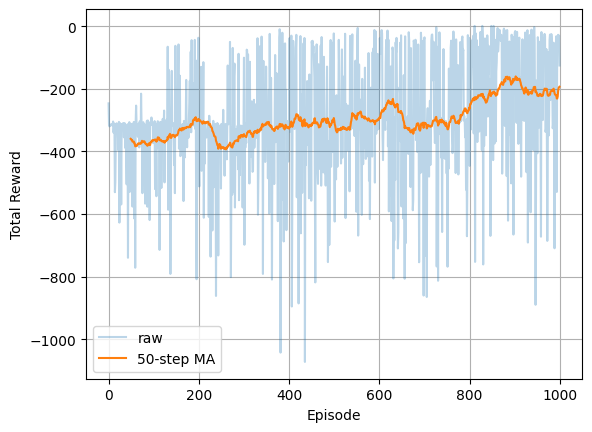

In [4]:
rewards = train_dqn(env, agent, episodes=1000, max_steps=300)
plot_rewards(rewards, window=50)
agent.save("../models/realistic_auv_dqn.pth")

In [5]:
# Evaluate the agent
sr, avg_steps = evaluate_agent(env, agent, episodes=1000, max_steps=300)
print(f"Success rate: {sr*100:.1f}%, Avg steps: {avg_steps:.1f}")

Success rate: 51.5%, Avg steps: 64.2


In [6]:
record_headless(env, agent, out_path='../gifs/realistic_auv.gif')

Headless recording saved to ../gifs/realistic_auv.gif


In [7]:
# Load the trained agent
agent.load("../models/realistic_auv_dqn.pth")

DQN Training: 100%|██████████| 2000/2000 [10:08<00:00,  3.29it/s, Rew=-174.36, ε=0.010] 


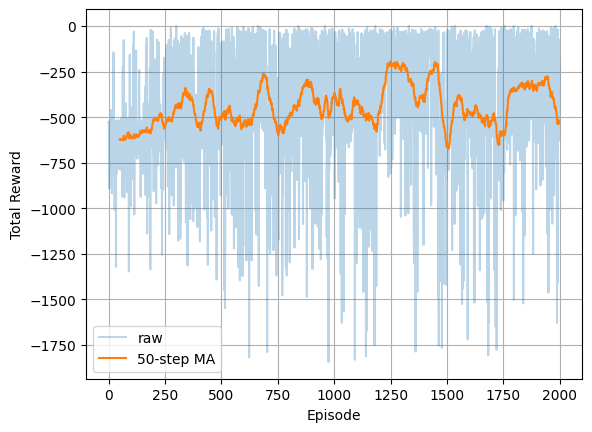

In [9]:
rewards = train_dqn(env, agent, episodes=2000, max_steps=500)
plot_rewards(rewards, window=50) 
agent.save("../models/realistic_auv_dqn.pth")

In [10]:
# Evaluate the agent
sr, avg_steps = evaluate_agent(env, agent, episodes=1000, max_steps=500)
print(f"Success rate: {sr*100:.1f}%, Avg steps: {avg_steps:.1f}")

Success rate: 38.4%, Avg steps: 81.4


In [12]:
record_headless(env, agent, out_path='../gifs/realistic_auv.gif')

Headless recording saved to ../gifs/realistic_auv.gif


In [15]:
enhanced_agent = DuelingDQNAgent(
    env             = env,
    hidden_dims     = [64,64], 
    lr              = 1e-3,
    gamma           = 0.99,
    epsilon_start   = 1.0,
    epsilon_min     = 0.01,
    epsilon_decay   = 0.997,
    batch_size      = 64,
    buffer_size     = 10_000,
    target_update   = 10,
    device          = device
)

DQN Training: 100%|██████████| 1000/1000 [02:21<00:00,  7.08it/s, Rew=-50.49, ε=0.050]


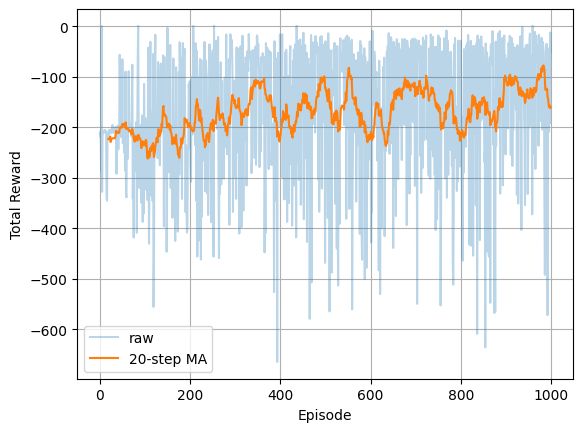

In [ ]:
rewards = train_dqn(
    env         = env,
    agent       = enhanced_agent,
    episodes    = 1000,
    max_steps   = 200
)

plot_rewards(rewards, window=50)

In [13]:
sr, avg_steps = evaluate_agent(env, enhanced_agent, episodes=1000, max_steps=200)
print(f"Success rate: {sr*100:.1f}%, Avg steps: {avg_steps:.1f}")

Success rate: 58.5%, Avg steps: 54.9


In [ ]:
record_headless(env, enhanced_agent, out_path="enhanced_dqn_run.gif", max_steps=200, fps=10)

Headless recording saved to enhanced_dqn_run.gif


DQN Training: 100%|██████████| 2000/2000 [05:07<00:00,  6.51it/s, Rew=-127.25, ε=0.010] 


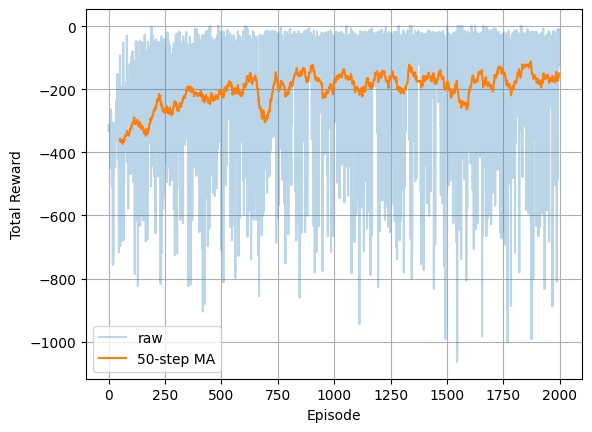

In [16]:
rewards = train_dqn(
    env         = env,
    agent       = enhanced_agent,
    episodes    = 2000,
    max_steps   = 300
)

plot_rewards(rewards, window=50)

In [17]:
sr, avg_steps = evaluate_agent(env, enhanced_agent, episodes=1000, max_steps=200)
print(f"Success rate: {sr*100:.1f}%, Avg steps: {avg_steps:.1f}")

Success rate: 75.6%, Avg steps: 63.8


In [18]:
record_headless(env, enhanced_agent, out_path="enhanced_dqn_run.gif", max_steps=200, fps=10)

Headless recording saved to enhanced_dqn_run.gif
